<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/peak2peak_aug_2022_oneBeat_kmeans_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose:
* in this jupyter notebook i want to cluster one beat ppg dataset in which each signal consists of 120 sample 
* but we will resample it to be 64 sample 
* used algorithm is K-means for time series from tslearn library
# Sequence:
* first read all datasets such as ID , systolic , diastolic 
* second train the model and predict output
* third again cluster datasets that do not similar to others datasets that belong to the same cluster 
* fourth redistribute sub-cluster that result from step number 3



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# data reading

In [ ]:
ppg_one_beat = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                           names = np.arange(120))
ppg_one_beat.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.00000,0.99971,0.99898,0.99602,0.99104,0.98427,0.97570,0.96534,0.95313,0.93891,...,0.86711,0.89480,0.91637,0.93424,0.95006,0.96290,0.97265,0.97946,0.98329,0.98515
1,1.00000,0.99986,0.99938,0.99671,0.99211,0.98582,0.97781,0.96817,0.95657,0.94259,...,0.87321,0.89588,0.91331,0.92665,0.93742,0.94541,0.95071,0.95352,0.95363,0.95355
2,1.00000,0.99805,0.99416,0.98829,0.98048,0.97107,0.96004,0.94735,0.93303,0.91708,...,0.83197,0.86486,0.89022,0.91013,0.92479,0.93626,0.94502,0.95083,0.95364,0.95499
3,0.91394,0.91331,0.91198,0.90826,0.90231,0.89456,0.88500,0.87378,0.86088,0.84626,...,0.86086,0.89582,0.92488,0.94820,0.96554,0.97851,0.98723,0.99360,0.99787,1.00000
4,0.91259,0.91280,0.91298,0.91087,0.90681,0.90120,0.89398,0.88514,0.87469,0.86219,...,0.91012,0.93643,0.95764,0.97392,0.98525,0.99285,0.99716,0.99942,0.99987,1.00000


In [ ]:
ppg_one_beat.shape

(154540, 120)

In [ ]:
ppg_10_beats = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/10_beat_signals/part_1_PPG_signals_10_beats_Aug_2022.csv",names = np.arange(1024))

In [ ]:
ppg_10_beats.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.93827,0.93797,0.93668,0.93271,0.92657,0.91835,0.90804,0.89557,0.88077,0.86366,...,0.83921,0.87134,0.89890,0.92160,0.93962,0.95299,0.96284,0.96939,0.97306,0.97468
1,0.97918,0.97711,0.97282,0.96595,0.95673,0.94525,0.93125,0.91482,0.89634,0.87574,...,0.81925,0.85823,0.89068,0.91687,0.93754,0.95296,0.96399,0.97080,0.97323,0.97392
2,0.91117,0.91058,0.90876,0.90415,0.89734,0.88842,0.87828,0.86690,0.85514,0.83849,...,0.77387,0.81272,0.84544,0.87188,0.89287,0.90876,0.92067,0.92875,0.93312,0.93501
3,0.94427,0.94437,0.94375,0.94039,0.93489,0.92729,0.91784,0.90638,0.89254,0.87656,...,0.69776,0.74174,0.77864,0.80684,0.82829,0.84364,0.85592,0.86501,0.87067,0.87340
4,0.88354,0.88384,0.88364,0.88063,0.87566,0.86903,0.86046,0.84995,0.83731,0.82326,...,0.76663,0.80782,0.84318,0.87221,0.89548,0.91317,0.92619,0.93491,0.93986,0.94210


In [ ]:
ppg_10_beats.shape

(15454, 1024)

In [ ]:
id = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Subj_ID_beats_P2P_Aug_2022.csv",names = ["ID"])
print("ID shape is ",id.shape)
id.head()

ID shape is  (154540, 1)


,ID
0,1
1,1
2,1
3,1
4,1


In [ ]:
sys_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_SYS_BP_beats_P2P_Aug_2022.csv",
                     names = ["sys"])
print("sys shape is ",sys_df.shape)
sys_df.head()

sys shape is  (154540, 1)


,sys
0,123.04
1,120.99
2,119.57
3,122.35
4,122.75


In [ ]:
dia_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Dia_BP_beats_P2P_Aug_2022.csv",
                     names = ["dia"])
print("diastolic shape is ",dia_df.shape)
dia_df.head()

diastolic shape is  (154540, 1)


,dia
0,66.526
1,65.598
2,66.135
3,66.135
4,67.503


In [ ]:
df_info = pd.DataFrame()
 
df_info["dia"]  = dia_df
df_info["sys"]  = sys_df
df_info["ID"] = id

In [ ]:
df_info.head()

,dia,sys,ID
0,66.526,123.04,1
1,65.598,120.99,1
2,66.135,119.57,1
3,66.135,122.35,1
4,67.503,122.75,1


# clustering step

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.3 MB/s 


In [ ]:
scaled_df = ppg_one_beat

#checking for best number of clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [ 6, 8 ,10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(scaled_df.values)
  cluster_labels = kmeans.labels_
  
  # silhouette score
  silhouette_avg.append(silhouette_score(scaled_df.values, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel('Values of K') 
plt.ylabel("‘Silhouette score’") 
plt.title("‘Silhouette analysis For Optimal k’")
plt.show()

# K Means Trainig

In [ ]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,  TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = scaled_df.values #, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
#X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
X_train = TimeSeriesResampler(sz=64).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=20, verbose=True, random_state=seed)
y_pred_eucl = km.fit_predict(X_train)



Euclidean k-means
1.508 --> 1.237 --> 1.201 --> 1.183 --> 1.169 --> 1.155 --> 1.148 --> 1.143 --> 1.139 --> 1.136 --> 1.135 --> 1.133 --> 1.132 --> 1.132 --> 1.131 --> 1.130 --> 1.130 --> 1.130 --> 1.129 --> 1.129 --> 1.128 --> 1.128 --> 1.128 --> 1.127 --> 1.127 --> 1.126 --> 1.126 --> 1.125 --> 1.125 --> 1.124 --> 1.124 --> 1.124 --> 1.123 --> 1.123 --> 1.122 --> 1.122 --> 1.122 --> 1.121 --> 1.121 --> 1.121 --> 1.121 --> 1.121 --> 1.120 --> 1.120 --> 1.120 --> 1.120 --> 1.120 --> 1.120 --> 1.120 --> 1.120 --> 


# evaluation

In [ ]:
X_train.shape

(154540, 64, 1)

In [ ]:
import sklearn

sklearn.metrics.davies_bouldin_score(X_train.reshape(154540, 64)[:,:] , y_pred_eucl[:])

1.3733834697168912

# clusters ploting


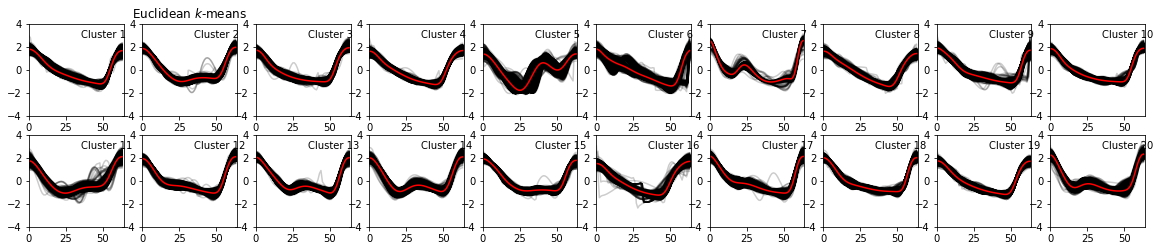

In [ ]:
plt.figure(figsize=(20,20))
for yi in range(20):
    plt.subplot(10,10, yi + 1)
    for xx in X_train[y_pred_eucl == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")


In [ ]:
df_info["10_labels_kmeans"] = y_pred_eucl

In [ ]:
y_pred_eucl[y_pred_eucl == 0 ].shape

(8596,)

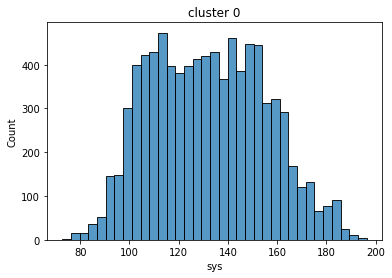

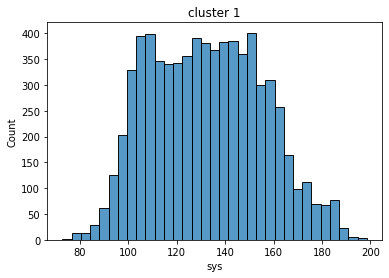

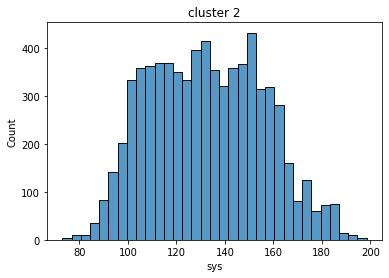

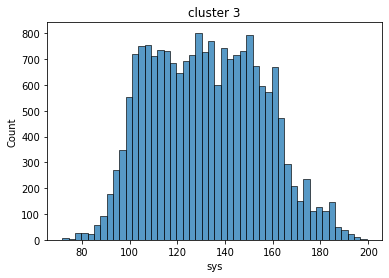

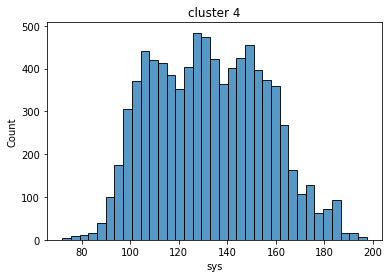

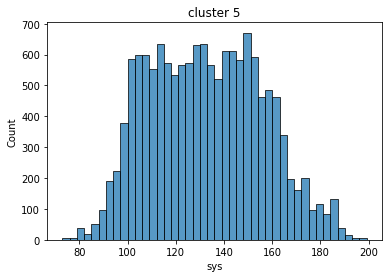

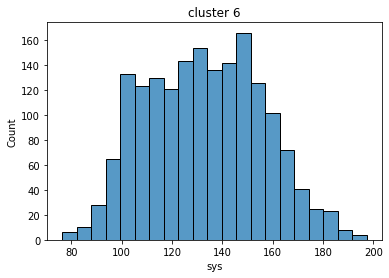

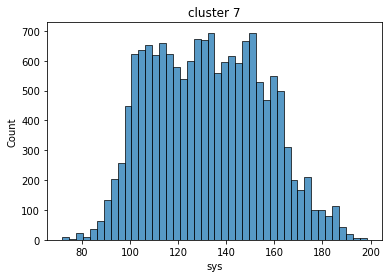

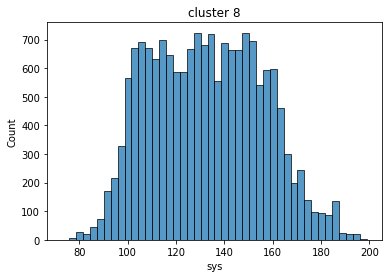

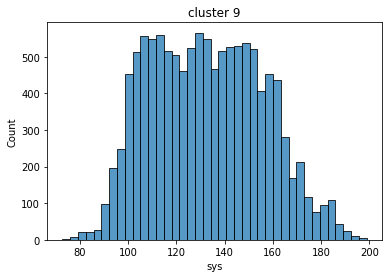

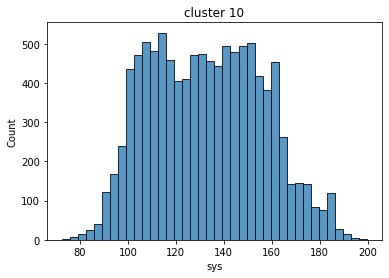

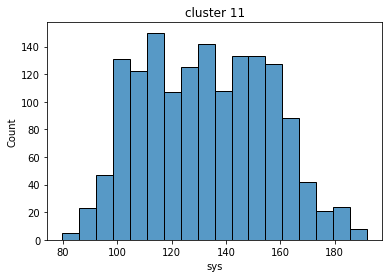

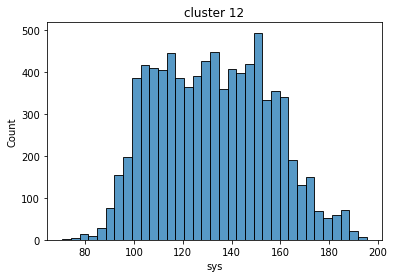

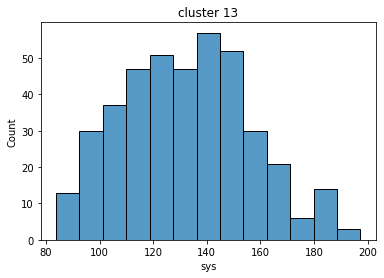

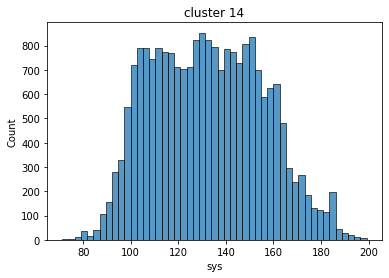

In [ ]:
for i in range(15):
  plt.figure()
  plt.title("cluster "+str(i))
  sns.histplot(x = df_info["sys"][df_info ["10_labels_kmeans"] == i]  )

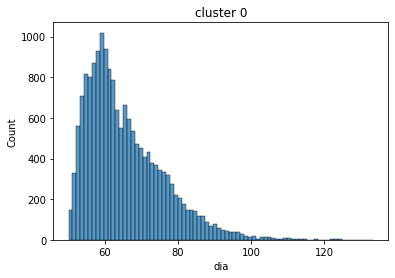

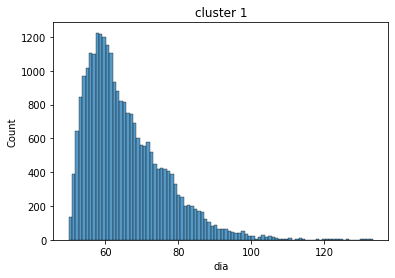

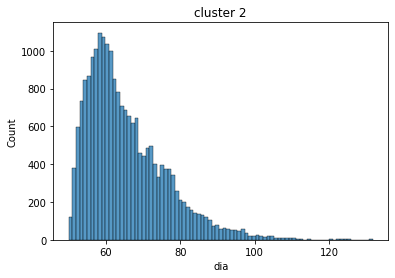

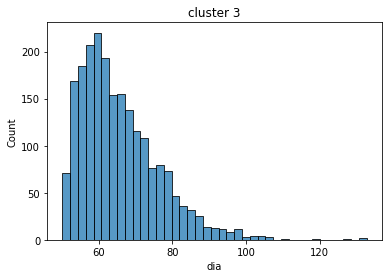

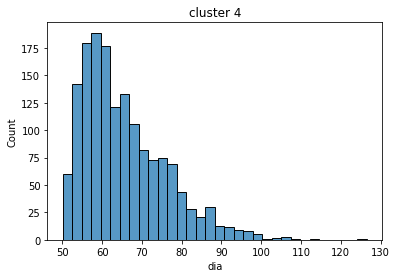

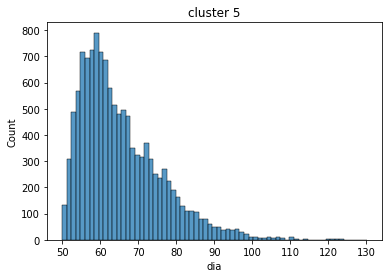

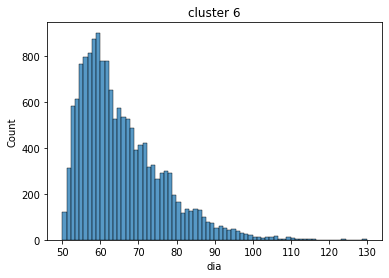

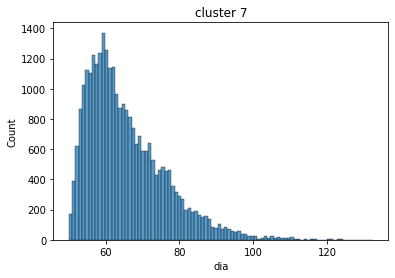

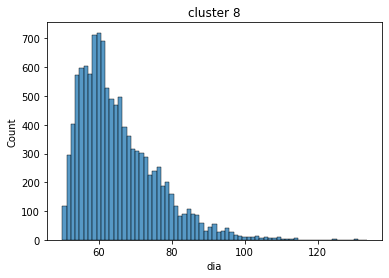

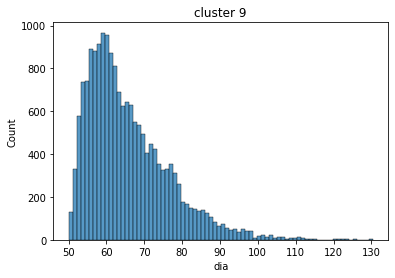

In [ ]:
import seaborn as sns
for i in range(10):
  plt.figure()
  plt.title("cluster "+str(i))
  sns.histplot(x = df_info["dia"][df_info ["10_labels_kmeans"] == i]  )
  
  

# for class 1

In [ ]:
X_train_1 = X_train[y_pred_eucl == 0,:,:]
X_train_1.shape

(17477, 64, 1)

In [ ]:
numpy.random.shuffle(X_train_1)

X_train_1 = TimeSeriesScalerMeanVariance().fit_transform(X_train_1)
# Make time series shorter
X_train_1 = TimeSeriesResampler(sz=64).fit_transform(X_train_1)
sz = X_train_1.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=4, verbose=True, random_state=seed)
y_pred_eucl_1 = km.fit_predict(X_train_1)

Euclidean k-means
1.735 --> 1.167 --> 1.147 --> 1.142 --> 1.139 --> 1.138 --> 1.137 --> 1.136 --> 1.136 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 1.135 --> 


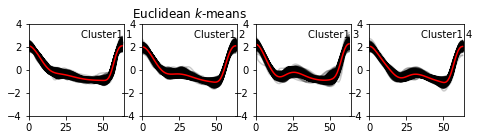

In [ ]:
plt.figure(figsize=(20,20))
for yi in range(4):
    plt.subplot(10,10, yi + 1)
    for xx in X_train_1[y_pred_eucl_1 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster1 %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [ ]:
y_pred_eucl_1.shape

(17477,)

In [ ]:
df_info_1 = pd.DataFrame()
df_info_1 = df_info[df_info ["10_labels_kmeans"] == 0]

In [ ]:
df_info_1.drop(["10_labels_kmeans"],axis = 1 ,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_info_1.head()

,dia,sys,ID,labels
0,66.526,123.04,1,3
1,65.598,120.99,1,3
2,66.135,119.57,1,0
6,67.063,121.62,1,3
7,67.503,122.06,1,1


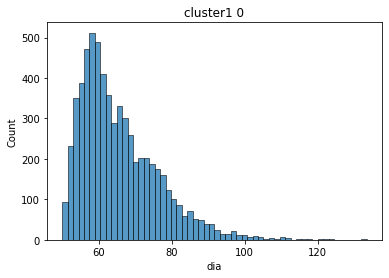

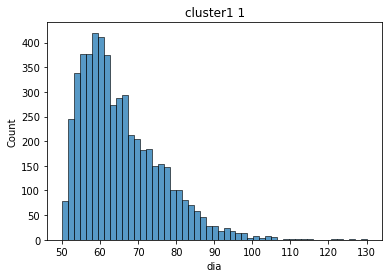

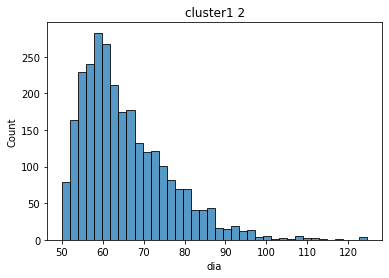

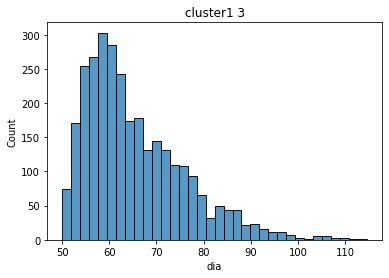

In [ ]:
for i in range(4):
  plt.figure()
  plt.title("cluster1 "+str(i))
  sns.histplot(x = df_info_1["dia"][df_info_1 ["labels"] == i]  )

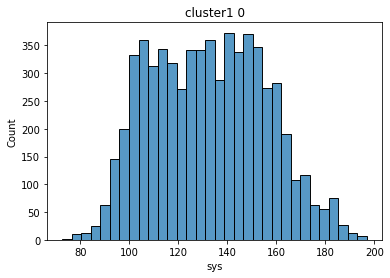

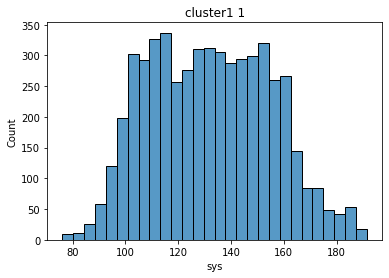

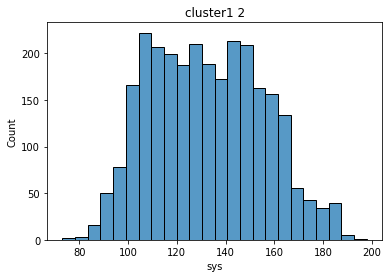

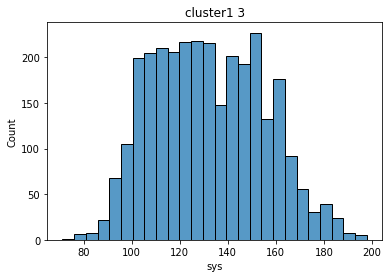

In [ ]:
for i in range(4):
  plt.figure()
  plt.title("cluster1 "+str(i))
  sns.histplot(x = df_info_1["sys"][df_info_1 ["labels"] == i]  )

# for class 2

In [ ]:
X_train_2 = X_train[y_pred_eucl == 1,:,:]
X_train_2.shape

NameError: ignored

In [ ]:
numpy.random.shuffle(X_train_2)

X_train_2 = TimeSeriesScalerMeanVariance().fit_transform(X_train_2)
# Make time series shorter
X_train_2 = TimeSeriesResampler(sz=64).fit_transform(X_train_2)
sz = X_train_2.shape[1]

# Euclidean k-means
print("Euclidean k-means")
#km = TimeSeriesKMeans(n_clusters=4, verbose=True, random_state=seed)
km = TimeSeriesKMeans(n_clusters=4,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred_eucl_2 = km.fit_predict(X_train_2)

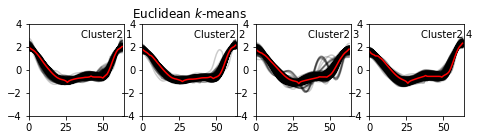

In [ ]:
plt.figure(figsize=(20,20))
for yi in range(4):
    plt.subplot(10,10, yi + 1)
    for xx in X_train_2[y_pred_eucl_2 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster2 %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# investigate the relation between cluster and systolic

In [ ]:
sys_one_beat = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_SYS_BP_beats_P2P_Aug_2022.csv")
sys_one_beat.head()

,123.04
0,120.99
1,119.57
2,122.35
3,122.75
4,122.75


In [ ]:
dia_one_beat = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Dia_BP_beats_P2P_Aug_2022.csv")
dia_one_beat.head()

,66.526
0,65.598
1,66.135
2,66.135
3,67.503
4,67.600


In [ ]:
df = pd.DataFrame()
df["sys"] = sys_one_beat
df["label"] = y_pred
df["dia"] = dia_one_beat


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


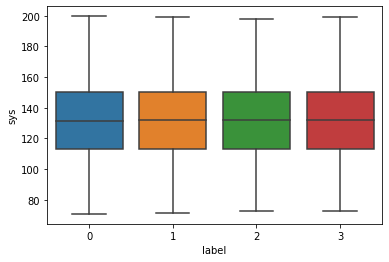

In [ ]:
import seaborn as sns
sns.boxplot("label","sys",data = df )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


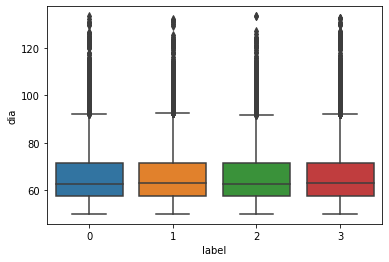

In [ ]:
sns.boxplot("label","dia",data = df )

In [ ]:
class_9 = scaled_df[y_pred == 8]

In [ ]:

#X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
X_train = TimeSeriesResampler(sz=64).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=10, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)


Euclidean k-means
1.948 --> 1.618 --> 1.586 --> 1.573 --> 1.565 --> 1.559 --> 1.555 --> 1.551 --> 1.547 --> 1.543 --> 1.539 --> 1.534 --> 1.529 --> 1.523 --> 1.517 --> 1.513 --> 1.510 --> 1.507 --> 1.506 --> 1.505 --> 1.504 --> 1.503 --> 1.503 --> 1.503 --> 1.502 --> 1.502 --> 1.502 --> 1.502 --> 1.501 --> 1.501 --> 1.501 --> 1.501 --> 1.500 --> 1.500 --> 1.500 --> 1.499 --> 1.499 --> 1.499 --> 1.498 --> 1.498 --> 1.497 --> 1.497 --> 1.496 --> 1.495 --> 1.495 --> 1.494 --> 1.493 --> 1.493 --> 1.492 --> 1.491 --> 


KeyboardInterrupt: ignored

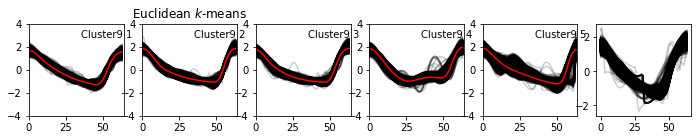

In [ ]:
plt.figure(figsize=(20,20))
for yi in range(10):
    plt.subplot(10,10, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster9 %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")


In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=8,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=100,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)
plt.figure(figsize=(20,20))



DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 154539 out of 154539 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 618156 out of 618156 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 618156 out of 618156 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 618156 out of 618156 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
for yi in range(7):
    plt.subplot(7, 7,1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

In [ ]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=8,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)
plt.figure(figsize=(20,20))



In [ ]:
for yi in range(7):
    plt.subplot(7, 7, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()